In [130]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [222]:
DATA_DIR = '../data/mnt/ssd/kaggle-talkingdata2/competition_files'
TRAIN_SAMPLE_FILE = DATA_DIR + '/train_sample.csv'
TRAIN_FILE = DATA_DIR + '/train.csv'
TEST_FILE = DATA_DIR + '/test.csv'
TEST_SUPPLEMENT_FILE = DATA_DIR + '/test_supplement.csv'

In [214]:
df = pd.read_csv(TRAIN_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         object
attributed_time    object
is_attributed      int64
dtypes: int64(6), object(2)
memory usage: 11.0+ GB


,events,ips
10494,45310,9062
10495,46648,11662
10496,49680,16560
10497,52682,26341
10498,39792,39792


,events,ips,ips_r,events_r,power
10494,184715088,183041,0.659855,0.998979,0.839785
10495,184761736,194703,0.701895,0.999231,0.861855
10496,184811416,211263,0.761594,0.999500,0.891916
10497,184864098,237604,0.856552,0.999785,0.937036
10498,184903890,277396,1.000000,1.000000,1.000000


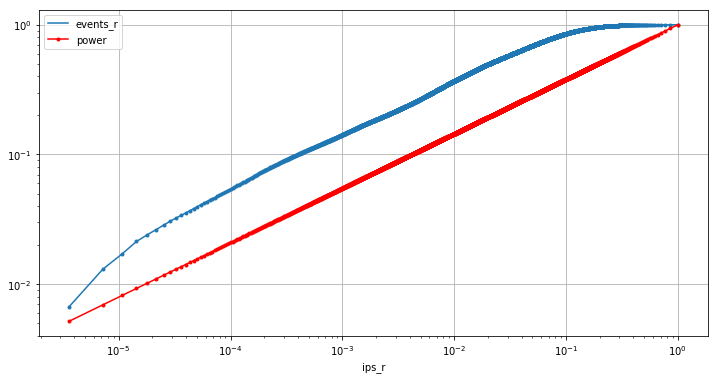

In [215]:
# ip column
ip_counts = df['ip'].value_counts().value_counts()
ip_counts.sort_index(inplace=True, ascending=False)

ip_counts_stats = pd.DataFrame({'ips': ip_counts.values, 'events': [i*v for i, v in ip_counts.iteritems()]})
ip_counts_stats.tail()

ip_counts_stats = ip_counts_stats.cumsum()
ip_counts_stats['ips_r'] = ip_counts_stats['ips'] / ip_counts_stats['ips'].iloc[-1]
ip_counts_stats['events_r'] = ip_counts_stats['events'] / ip_counts_stats['events'].iloc[-1]
ip_counts_stats['power'] = np.power(ip_counts_stats['ips_r'], 0.42)
ip_counts_stats.tail()

fh, ax = plt.subplots(figsize=[12, 6]);
ip_counts_stats.plot(ax=ax, x='ips_r', y='events_r', style='.-', logx=True, logy=True)
ip_counts_stats.plot(ax=ax, x='ips_r', y='power', style='r.-', logx=True, logy=True)
ax.grid()

,apps,events
0,1,33911780
1,1,24179003
2,1,21642136
3,1,16458268
4,1,15958970


,apps,events
340,10,50
341,21,84
342,36,108
343,49,98
344,132,132


,apps,events,apps_r,events_r,power
0,1,33911780,0.001416,0.183402,0.037635
1,2,58090783,0.002833,0.314167,0.053225
2,3,79732919,0.004249,0.431213,0.065187
3,4,96191187,0.005666,0.520223,0.075271
4,5,112150157,0.007082,0.606532,0.084156


,apps,events,apps_r,events_r,power
340,468,184903468,0.662890,0.999998,0.814180
341,489,184903552,0.692635,0.999998,0.832247
342,525,184903660,0.743626,0.999999,0.862338
343,574,184903758,0.813031,0.999999,0.901682
344,706,184903890,1.000000,1.000000,1.000000


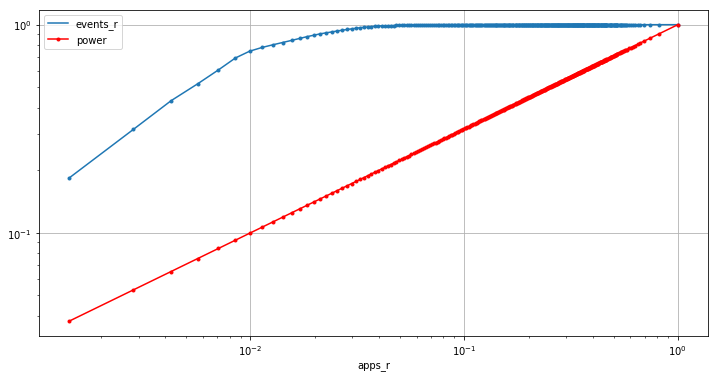

In [216]:
# app column
app_counts = df['app'].value_counts().value_counts()
app_counts.sort_index(inplace=True, ascending=False)
app_counts_stats = pd.DataFrame({'apps': app_counts.values, 'events': [i*v for i, v in app_counts.iteritems()]})
app_counts_stats.head()
app_counts_stats.tail()

app_counts_stats = app_counts_stats.cumsum()
app_counts_stats['apps_r'] = app_counts_stats['apps'] / app_counts_stats['apps'].iloc[-1]
app_counts_stats['events_r'] = app_counts_stats['events'] / app_counts_stats['events'].iloc[-1]
app_counts_stats['power'] = np.power(app_counts_stats['apps_r'], 0.5)
app_counts_stats.head()
app_counts_stats.tail()

fh, ax = plt.subplots(figsize=[12, 6]);
app_counts_stats.plot(ax=ax, x='apps_r', y='events_r', style='.-', logx=True, logy=True)
app_counts_stats.plot(ax=ax, x='apps_r', y='power', style='r.-', logx=True, logy=True)
ax.grid()

In [217]:
# device column
device_counts = df['device'].value_counts().value_counts()
device_counts.sort_index(inplace=True, ascending=False)
device_counts_stats = pd.DataFrame({'devices': device_counts.values, 'events': [i*v for i, v in device_counts.iteritems()]})
device_counts_stats

,devices,events
0,1,174330052
1,1,8105054
2,1,1033413
3,1,692891
4,1,266596
5,1,178274
6,1,24018
7,1,14379
8,1,12569
9,1,12351


,events,os
0,44181914,1
1,39782808,1
2,9639776,1
3,8974159,1
4,7414405,1


,events,os
242,115,23
243,144,36
244,201,67
245,228,114
246,220,220


,events,os,os_r,events_r,power
0,44181914,1,0.00125,0.238945,0.262653
1,83964722,2,0.00250,0.454099,0.301709
2,93604498,3,0.00375,0.506233,0.327195
3,102578657,4,0.00500,0.554767,0.346572
4,109993062,5,0.00625,0.594866,0.362390


,events,os,os_r,events_r,power
242,184903097,363,0.45375,0.999996,0.853814
243,184903241,399,0.49875,0.999996,0.870115
244,184903442,466,0.58250,0.999998,0.897551
245,184903670,580,0.72500,0.999999,0.937708
246,184903890,800,1.00000,1.000000,1.000000


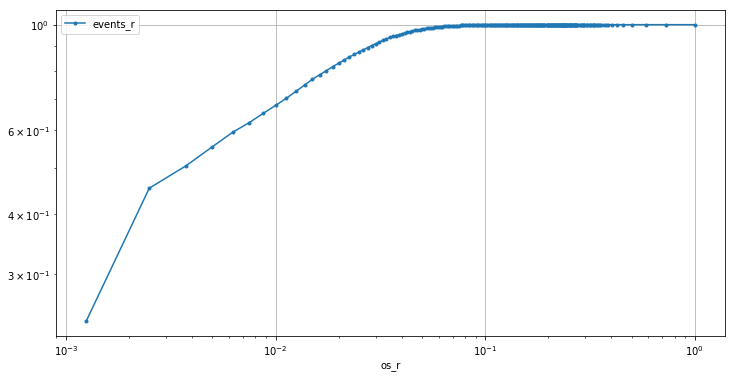

In [218]:
# os column
os_counts = df['os'].value_counts().value_counts()
os_counts.sort_index(inplace=True, ascending=False)
os_counts_stats = pd.DataFrame({'os': os_counts.values, 'events': [i*v for i, v in os_counts.iteritems()]})
os_counts_stats.head()
os_counts_stats.tail()

os_counts_stats = os_counts_stats.cumsum()
os_counts_stats['os_r'] = os_counts_stats['os'] / os_counts_stats['os'].iloc[-1]
os_counts_stats['events_r'] = os_counts_stats['events'] / os_counts_stats['events'].iloc[-1]
os_counts_stats['power'] = np.power(os_counts_stats['os_r'], 0.2)
os_counts_stats.head()
os_counts_stats.tail()

fh, ax = plt.subplots(figsize=[12, 6]);
os_counts_stats.plot(ax=ax, x='os_r', y='events_r', style='.-', logx=True, logy=True)
ax.grid()

,channels,events
0,1,15065927
1,1,8873025
2,1,8457471
3,1,7188340
4,1,5924250


,channels,events
182,1,6
183,1,5
184,1,3
185,4,8
186,11,11


,channels,events,channels_r,events_r,power
0,1,15065927,0.004950,0.081480,0.345883
1,2,23938952,0.009901,0.129467,0.397316
2,3,32396423,0.014851,0.175207,0.430878
3,4,39584763,0.019802,0.214083,0.456396
4,5,45509013,0.024752,0.246123,0.477226


,channels,events,channels_r,events_r,power
182,185,184903863,0.915842,1.0,0.982571
183,186,184903868,0.920792,1.0,0.983631
184,187,184903871,0.925743,1.0,0.984687
185,191,184903879,0.945545,1.0,0.988864
186,202,184903890,1.000000,1.0,1.000000


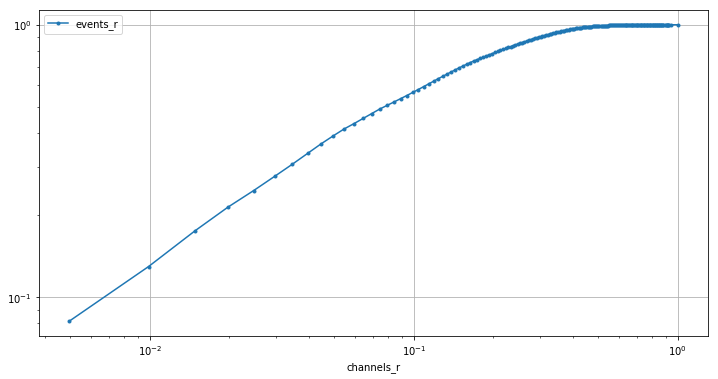

In [219]:
# channel
channel_counts = df['channel'].value_counts().value_counts()
channel_counts.sort_index(inplace=True, ascending=False)
channel_counts_stats = pd.DataFrame({'channels': channel_counts.values, 'events': [i*v for i, v in channel_counts.iteritems()]})
channel_counts_stats.head()
channel_counts_stats.tail()

channel_counts_stats = channel_counts_stats.cumsum()
channel_counts_stats['channels_r'] = channel_counts_stats['channels'] / channel_counts_stats['channels'].iloc[-1]
channel_counts_stats['events_r'] = channel_counts_stats['events'] / channel_counts_stats['events'].iloc[-1]
channel_counts_stats['power'] = np.power(channel_counts_stats['channels_r'], 0.2)
channel_counts_stats.head()
channel_counts_stats.tail()

fh, ax = plt.subplots(figsize=[12, 6]);
channel_counts_stats.plot(ax=ax, x='channels_r', y='events_r', style='.-', logx=True, logy=True)
ax.grid()

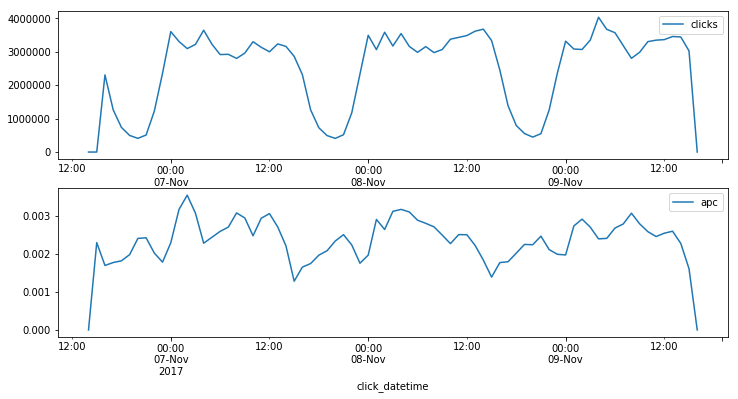

In [220]:
# click time
df["click_datetime"] = pd.to_datetime(df['click_time'])
event_freq = df.groupby(pd.Grouper(key='click_datetime', freq='1H'))['ip', 'attributed_time'].count()
event_freq['apc'] = event_freq['attributed_time'] / event_freq['ip']

fh, (ax1, ax2) = plt.subplots(2, 1, figsize=[12, 6])
event_freq.plot(ax=ax1, y='ip', label='clicks')
event_freq.plot(ax=ax2, y='apc')
ax.grid()

In [227]:
df_test = pd.read_csv(TEST_FILE)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      int64
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(6), object(1)
memory usage: 1003.5+ MB


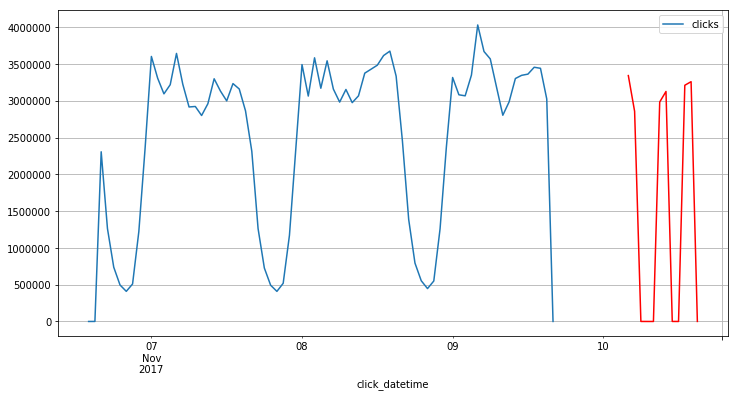

In [233]:
df_test["click_datetime"] = pd.to_datetime(df_test['click_time'])
event_freq_test = df_test.groupby(pd.Grouper(key='click_datetime', freq='1H'))['ip'].count()

fh, ax1 = plt.subplots(figsize=[12, 6])
event_freq.plot(ax=ax1, y='ip', label='clicks')
event_freq_test.plot(ax=ax1, y='ip', label='clicks_test', style='r')
ax1.grid()

In [231]:
df_test_supplement = pd.read_csv(TEST_SUPPLEMENT_FILE)
df_test_supplement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57537505 entries, 0 to 57537504
Data columns (total 7 columns):
click_id      int64
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(6), object(1)
memory usage: 3.0+ GB


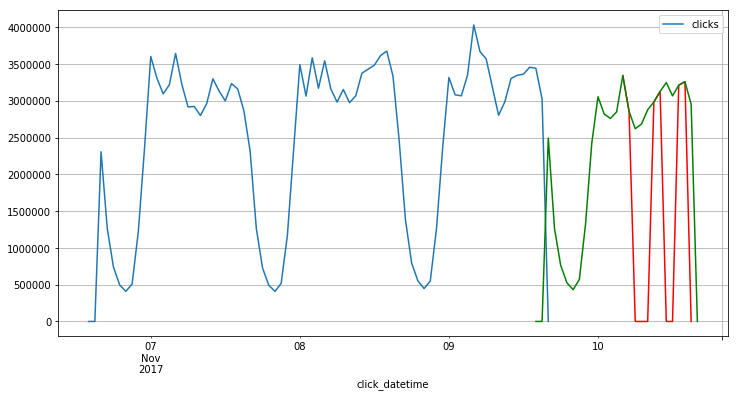

In [235]:
df_test_supplement["click_datetime"] = pd.to_datetime(df_test_supplement['click_time'])
event_freq_test_supplement = df_test_supplement.groupby(pd.Grouper(key='click_datetime', freq='1H'))['ip'].count()

fh, ax1 = plt.subplots(figsize=[12, 6])
event_freq.plot(ax=ax1, y='ip', label='clicks')
event_freq_test.plot(ax=ax1, y='ip', label='clicks_test', style='r')
event_freq_test_supplement.plot(ax=ax1, y='ip', label='clicks_test_supplement', style='g')
ax1.grid()